In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 109880_1591276628_fd
 158593_1607274753_Ep_5_fd
 190656_1609341408_Ep_5_fd
 194844_1609769024_Ep_2_fd
'1st page.png'
 203898_1610381449_Ep_22_fd
 232878_1611558064_Ep_3_fd
 269513_1613605208_Ep_6_fd
 271317_1612948050_Ep_7_fd
 328495_1616102494_Ep_4_fd
 adithia_jovandy.docx
 adithia_jovandy.pdf
'adithia jovandy.pptx'
 app-debug.apk
 backup
 Carnival_Row_Ep_6_ff
'case (39).jpg'
'case (40).jpg'
'case (41).jpg'
'case (42).jpeg'
'Charlie\'\''s_Angels'
 Classroom
 Clouds
 Codes.rar
'Colab Notebooks'
 com.docx
 custom-yolov4-tiny-detector_final.weights
 custom.zip
 darknet.zip
 Data.csv
 Dataset_P1.zip
 data.zip
'Document from Adithia Jovandy.pdf'
 Ep_6_ff
'[FILMAPIK.CA] - Samson (2018)'
'[FILMAPIK.INFO] - Transpecos (2016)'
 galbo.zip
 gambar
 Gdrive
 images
 images.txt
 image_tabular-master.zip
 IMG_20201231_191850-removebg-preview.png
 input.png
 iris_multimodal_dataset
'iris_multimodal_dataset (1).zip'
 iris_multimodal_dataset.zip
 logs.zip
 mask_rcnn_coco.zip
 models
 ModelTrainingOnCo

In [4]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov4

backup		  generate_train.py  obj.data	yolov4-custom.cfg
generate_test.py  obj		     obj.names	yolov4_detect_videos.cfg


In [3]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 14737 (delta 0), reused 0 (delta 0), pack-reused 14736
Receiving objects: 100% (14737/14737), 13.27 MiB | 24.23 MiB/s, done.
Resolving deltas: 100% (10025/10025), done.


In [5]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [7]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# Step 4: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [8]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [9]:
!cp /mydrive/yolov4/backup/yolov4-custom_last.weights ./

In [10]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./cfg
!cp /mydrive/yolov4/obj.data  ./cfg

!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

!cp /mydrive/yolov4/yolov4_detect_videos.cfg  ./cfg


In [12]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/videos/1.mov ./

In [13]:
!./darknet detector demo cfg/obj.data cfg/yolov4_detect_videos.cfg yolov4-custom_last.weights -dont_show 1.mov -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.
ra: 34% 
ra: 32% 
la: 32% 
aorta: 96% 
aorta: 79% 
aorta: 28% 
aorta: 26% 

FPS:26.2 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

lv: 60% 
ra: 30% 
la: 36% 
la: 33% 
la: 31% 
aorta: 93% 
aorta: 81% 
aorta: 57% 
aorta: 55% 

FPS:25.8 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

lv: 64% 
lv: 39% 
lv: 38% 
ra: 29% 
ra: 28% 
la: 35% 
la: 28% 
la: 27% 
aorta: 51% 
aorta: 45% 
aorta: 45% 

FPS:25.9 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

rv: 28% 
lv: 52% 
lv: 39% 
lv: 35% 
la: 31% 
aorta: 59% 
aorta: 48% 
aorta: 47% 

FPS:25.6 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

rv: 45% 
lv: 73% 
la: 25% 
aorta: 79% 
aorta: 31% 

FPS:25.8 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

lv: 59% 
lv: 49% 
lv: 31% 
ra: 26% 
aorta: 61% 
aorta: 60% 
aorta: 55% 

FPS:25.8 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

rv: 31% 
lv: 52% 
lv: 49% 
la: 27% 
aorta: 91% 
aorta: 84% 
aorta: 55% 
aorta: 48% 

FPS:25.9 	 AVG_FPS:27.0

 cvWriteFrame 
Objects:

rv: 38% 
rv: 31% 
lv: 25% 
r

In [ ]:
# download the video with detections shown
download('results.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 6, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

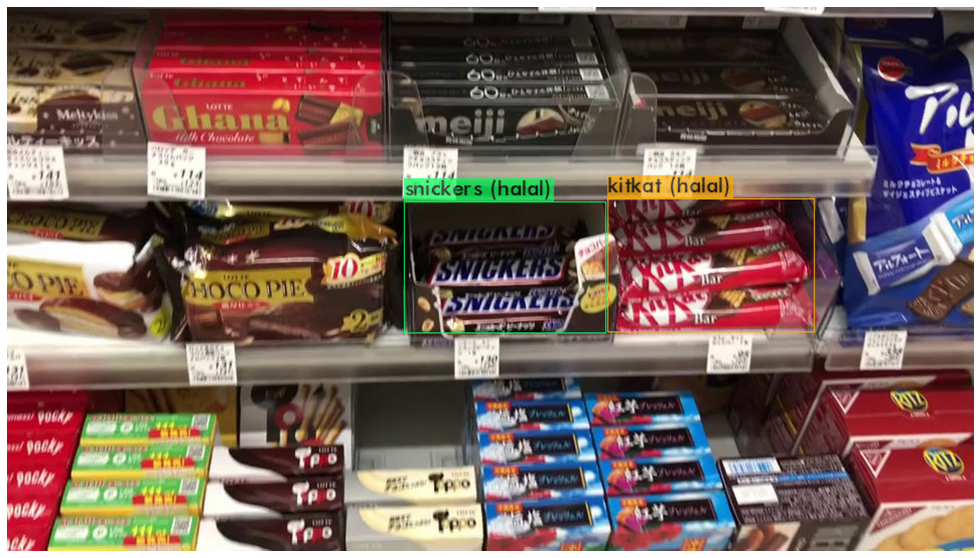

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4_detect_videos.cfg yolov4-custom_last.weights /mydrive/images/1.jpg -thresh 0.3 -out_filename results.jpg
imShow('predictions.jpg')
download("predictions.jpg")